<a href="https://colab.research.google.com/github/bhumilch191/DEEP-LEARNING--PROJECT/blob/main/DEEP_LEARNING_PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import keras
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist


In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
(x_train, x_test) = (x_train/255, x_test/255)
x_train.shape, x_test.shape

((60000, 28, 28), (10000, 28, 28))

## Implement CNN Architecture

In [ ]:
model = keras.models.Sequential()
model.add(keras.Input(shape=(28,28,1)))
model.add(keras.layers.Conv2D(64, 7, activation='relu', padding='same'))
model.add(keras.layers.MaxPooling2D(2))
model.add(keras.layers.Conv2D(128, 3, activation='relu', padding='same'))
model.add(keras.layers.Conv2D(128, 3, activation='relu', padding='same'))
model.add(keras.layers.MaxPooling2D(2))
model.add(keras.layers.Conv2D(256, 3, activation='relu', padding='same'))
model.add(keras.layers.Conv2D(256, 3, activation='relu', padding='same'))
model.add(keras.layers.MaxPooling2D(2))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(10, activation='softmax'))

In [ ]:
cb1 = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)
cb2 = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)
cb3 = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

cb_list = [cb1, cb2, cb3]

In [ ]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_5 (Conv2D)               │ (None, 28, 28, 64)     │         3,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 14, 14, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 14, 14, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 7, 7, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 7, 7, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 3, 3, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │       295,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,413,834 (5.39 MB)

 Trainable params: 1,413,834 (5.39 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(x_train, y_train, epochs=50, callbacks=cb_list[:1], validation_split=0.1)

Epoch 1/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.9912 - loss: 0.0402 - val_accuracy: 0.9905 - val_loss: 0.0468
Epoch 2/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 21s 8ms/step - accuracy: 0.9919 - loss: 0.0402 - val_accuracy: 0.9947 - val_loss: 0.0275
Epoch 3/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.9923 - loss: 0.0351 - val_accuracy: 0.9903 - val_loss: 0.0489
Epoch 4/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.9917 - loss: 0.0350 - val_accuracy: 0.9923 - val_loss: 0.0454
Epoch 5/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 21s 8ms/step - accuracy: 0.9926 - loss: 0.0306 - val_accuracy: 0.9928 - val_loss: 0.0440


In [ ]:
history.history

{'accuracy': [0.9898518323898315,
  0.9915740489959717,
  0.9907222390174866,
  0.9917036890983582,
  0.9925740957260132],
 'loss': [0.045775558799505234,
  0.03988596796989441,
  0.04181208834052086,
  0.036032456904649734,
  0.032372623682022095],
 'val_accuracy': [0.9904999732971191,
  0.9946666955947876,
  0.9903333187103271,
  0.9923333525657654,
  0.9928333163261414],
 'val_loss': [0.046787578612565994,
  0.027465974912047386,
  0.048866745084524155,
  0.045419201254844666,
  0.043992217630147934]}

#### Plot validation loss and training loss

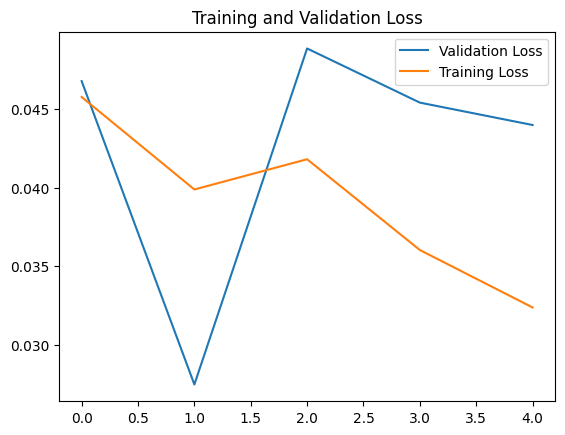

In [ ]:
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.plot(history.history['loss'], label='Training Loss')
plt.legend()
plt.title("Training and Validation Loss")
plt.show()

### Plot validation and training accuracy

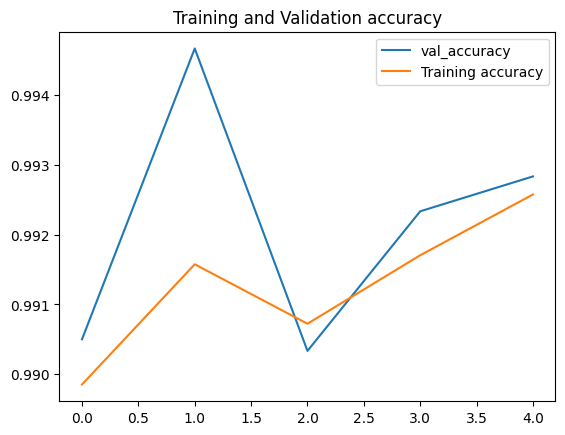

In [ ]:
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.plot(history.history['accuracy'], label='Training accuracy')
plt.legend()
plt.title("Training and Validation accuracy")
plt.show()

In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_acc} Test loss: {test_loss}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9922 - loss: 0.0463
Test accuracy: 0.9937000274658203 Test loss: 0.04123978689312935


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


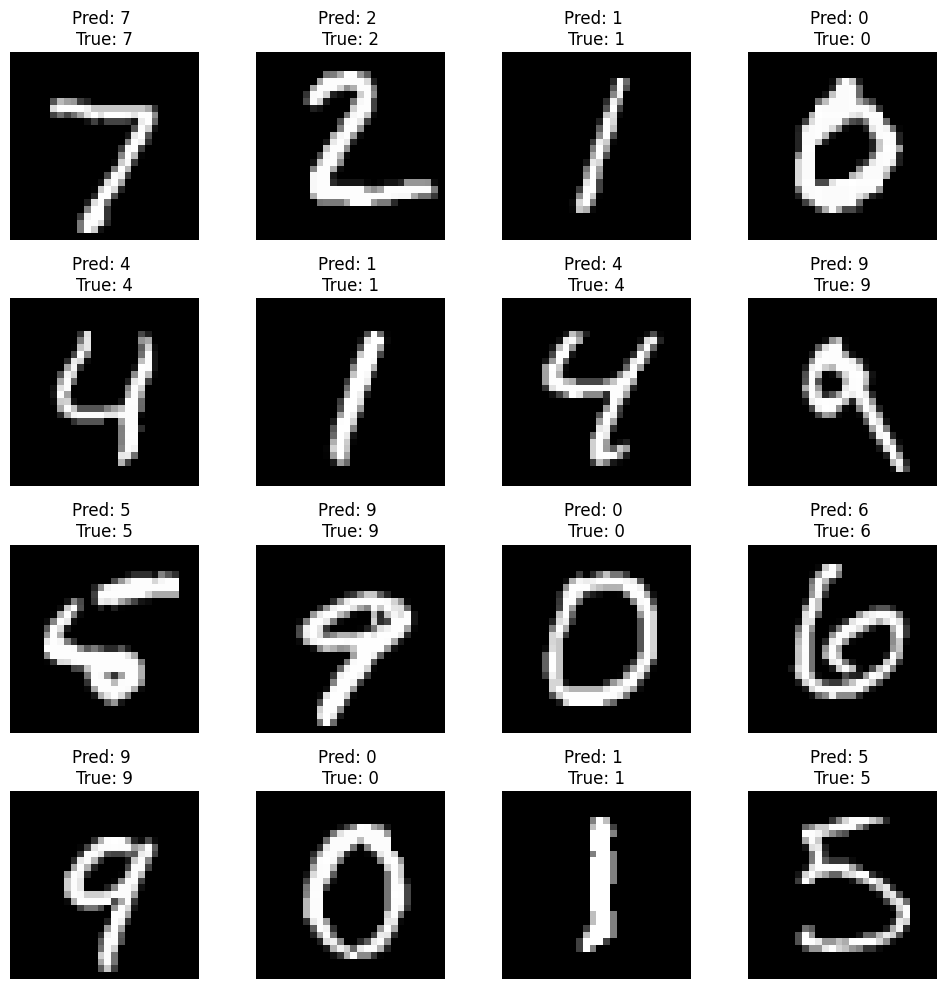

In [ ]:
x_test_reshaped = x_test.reshape(x_test.shape[0], 28, 28, 1)
predictions = model.predict(x_test_reshaped[:16])

plt.figure(figsize=(10, 10))
for i in range(16):
    plt.subplot(4, 4, i+1)
    plt.imshow(x_test[i].reshape(28,28), cmap='gray')
    plt.title(f"Pred: {np.argmax(predictions[i])} \nTrue: {int(y_test[i])}")
    plt.axis('off')
plt.tight_layout()
plt.show()